Imports and Initialization

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
import matplotlib.pyplot as plt
# we can use the LabelEncoder to encode the gender feature
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# importing two different imputation methods that take into consideration all the features when predicting the missing values
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.dummy import DummyClassifier

# oversample the minority class using SMOTE
#from imblearn.over_sampling import SMOTE
from collections import Counter

np.random.seed(42)

#### Data Summarization

Line graphs of all key indicators over time

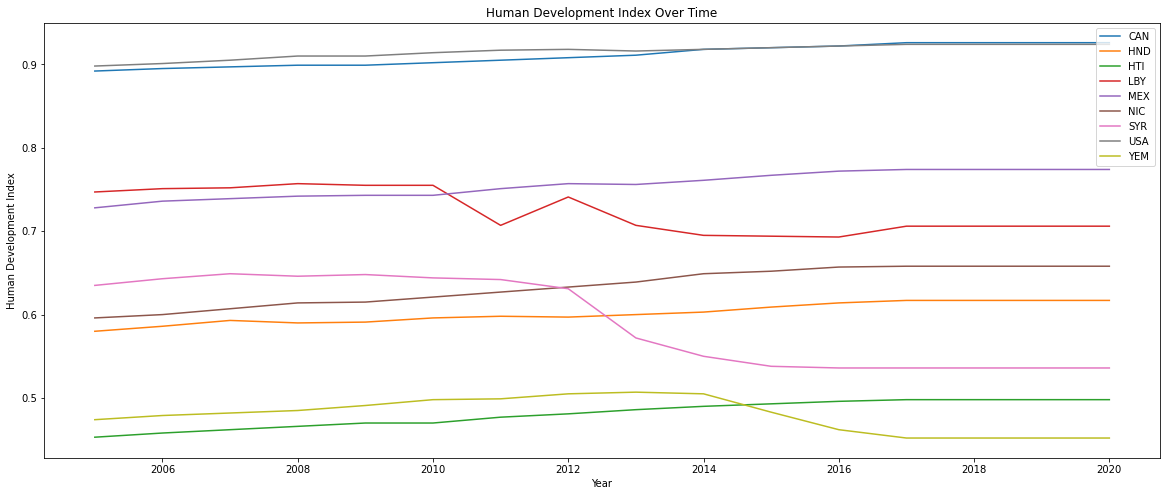

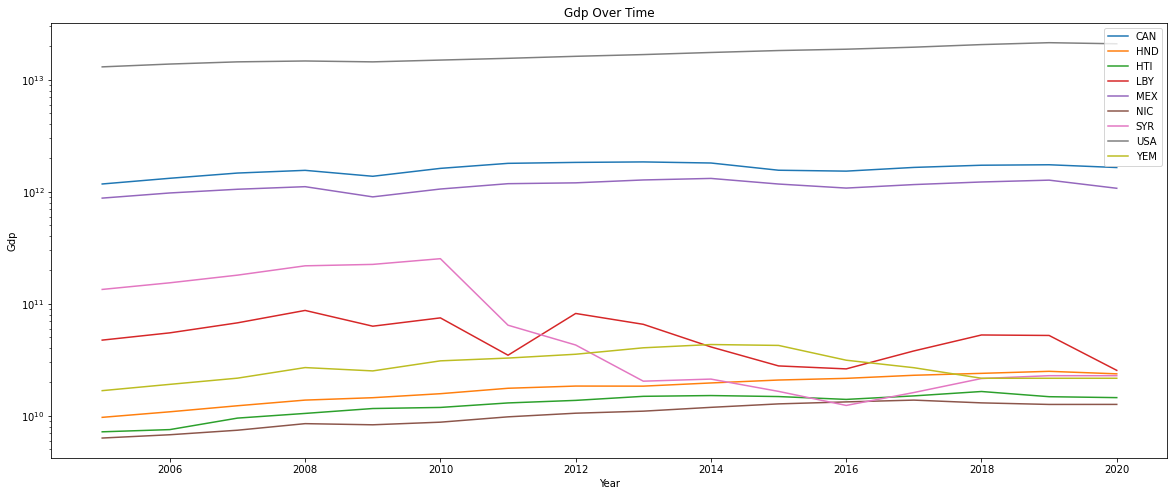

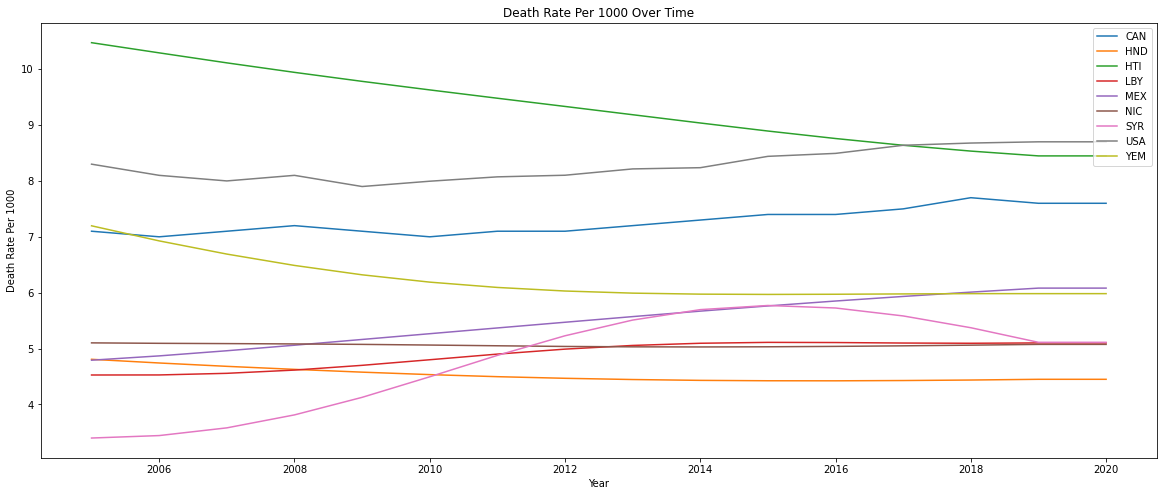

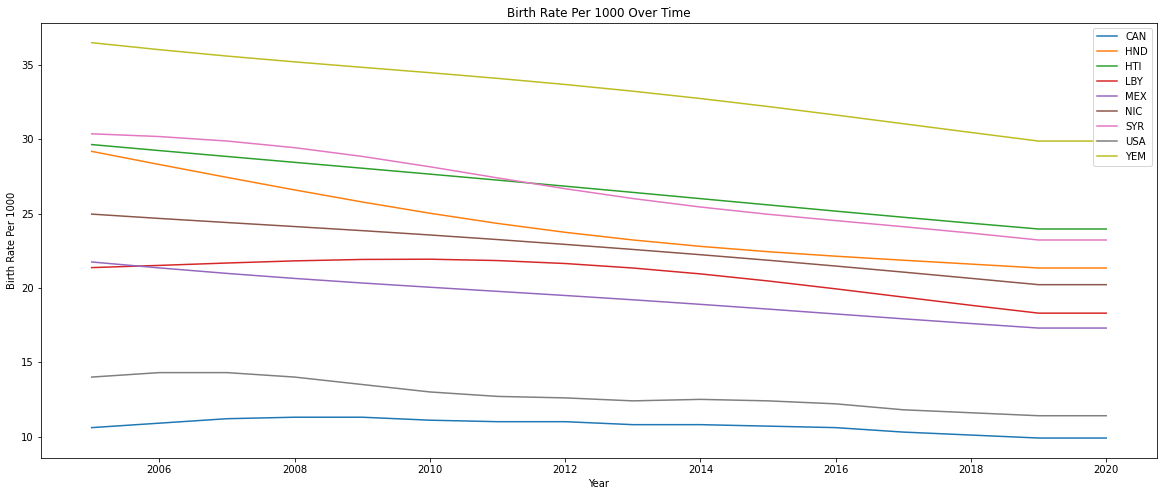

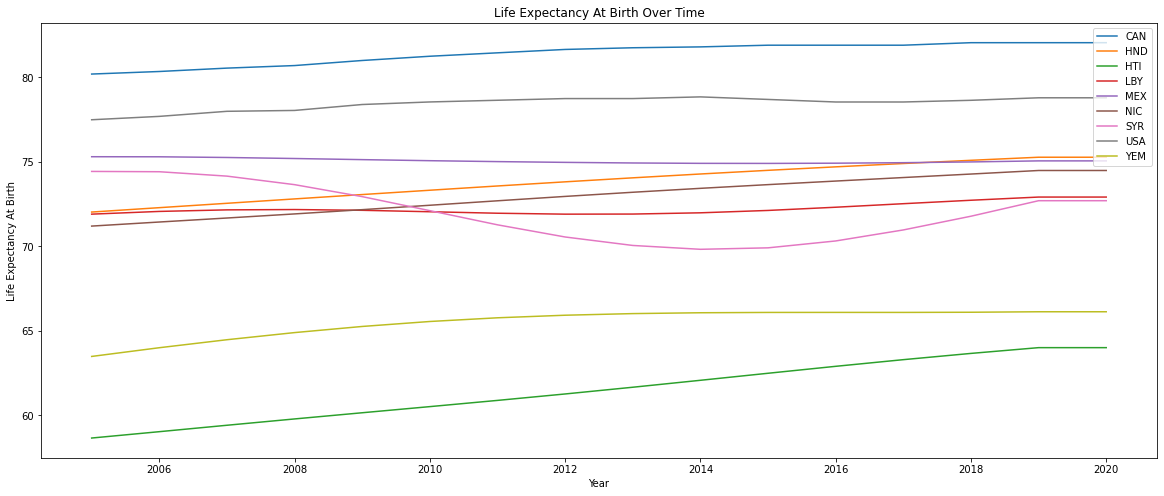

In [61]:
keyIndicators = pd.read_csv("data/key_indicators")

countryCodes = [
    'CAN',
    'HND',
    'HTI',
    'LBY',
    'MEX',
    'NIC',
    'SYR',
    'USA',
    'YEM'
]

facts = ['human_development_index','gdp','death_rate_per_1000','birth_rate_per_1000','life_expectancy_at_birth']

for fact in facts:
    columnLbl = fact.replace("_", " ").title()

    fig, ax = plt.subplots(figsize=(20, 8))

    # Iterate through the countries and show the key indicator over time
    for key, group in keyIndicators.groupby(['country_code']):
        ax = group.plot(logy=(fact == 'gdp'), ax=ax, kind='line', x='yr', y=fact, label=str(key)) # increase clarity of label    
        
    # The labels are used to define the legend. Move the legend to the upper right.    
    plt.legend(loc='upper right')

    # Define the name of the axes.
    plt.xlabel("Year")
    plt.ylabel(columnLbl)

    # Title the figure.
    plt.title(columnLbl + " Over Time")

    # Plot the figure
    plt.show()

Histograms of Attributes vs Human Development Index (HDI)

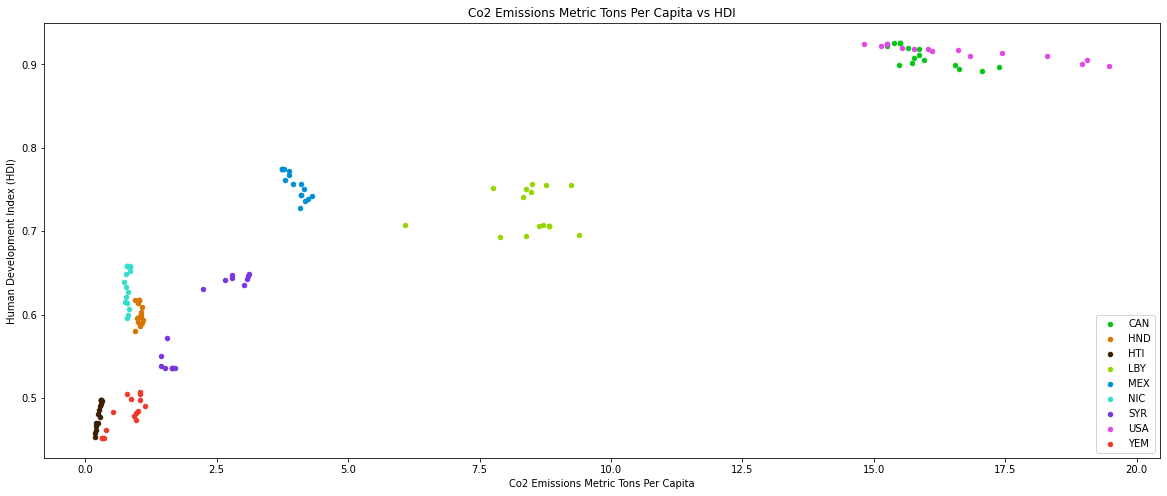

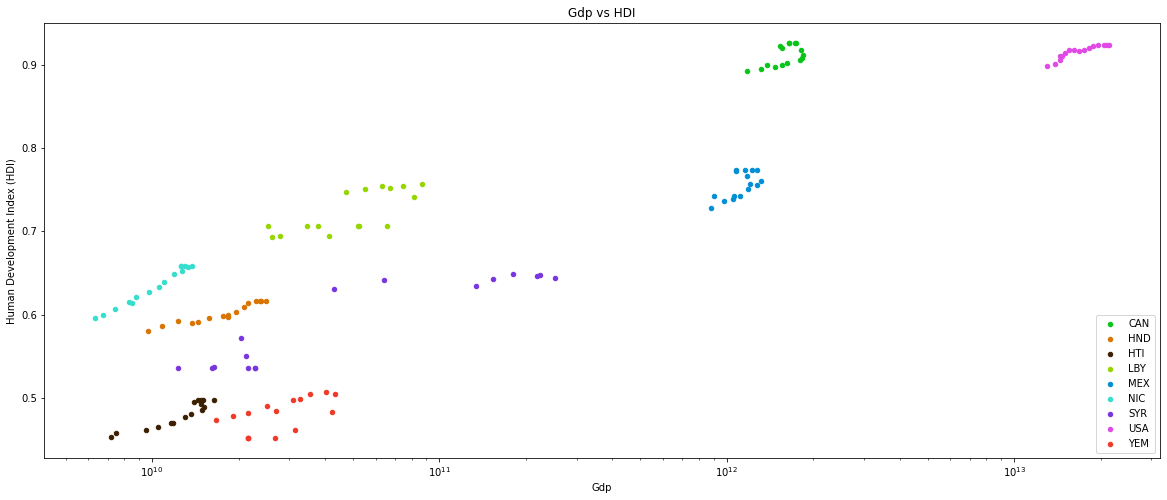

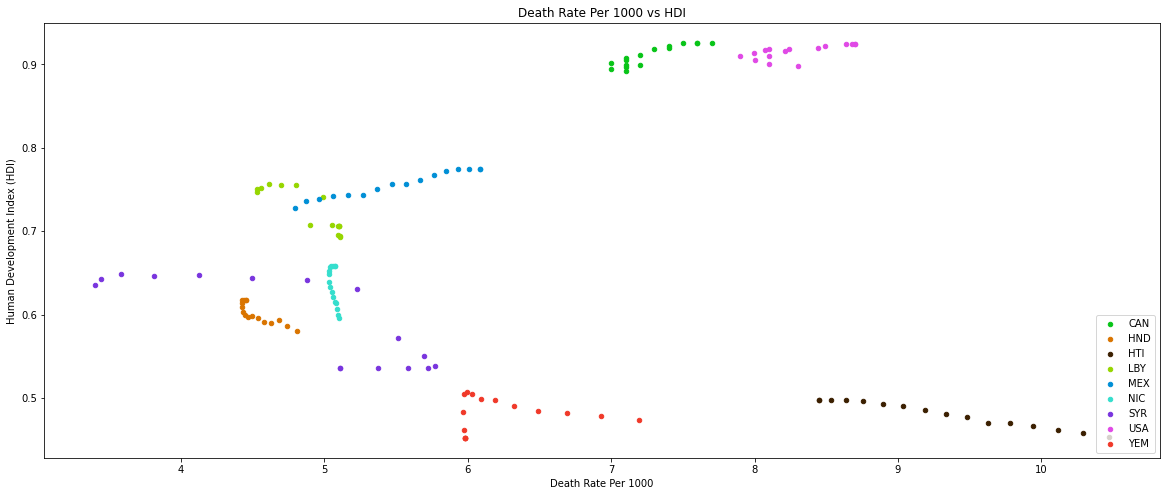

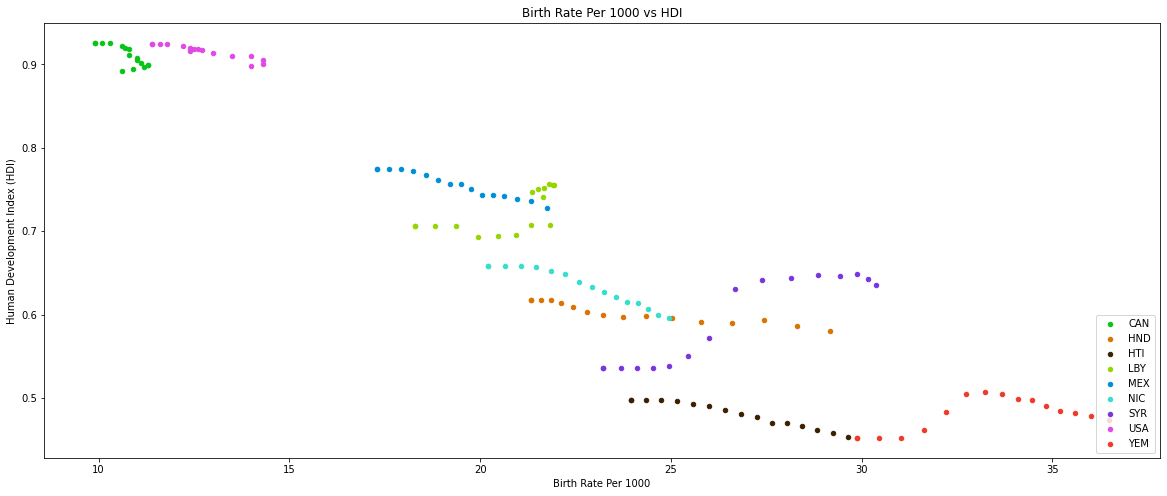

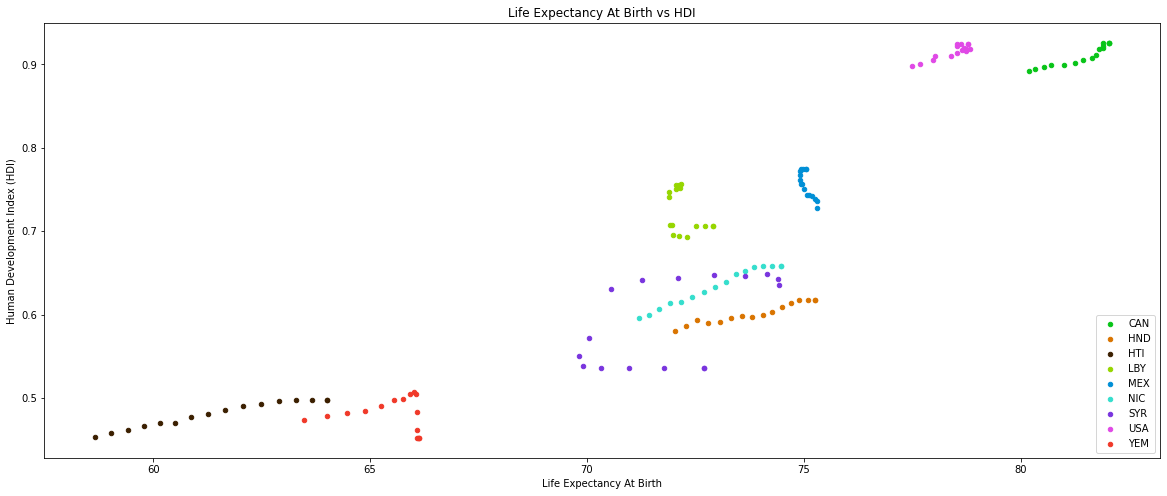

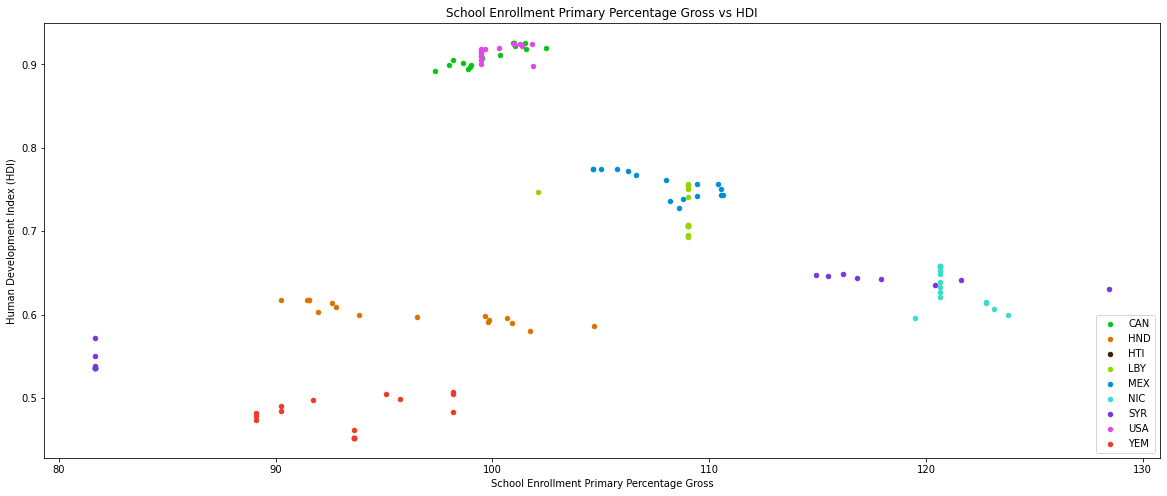

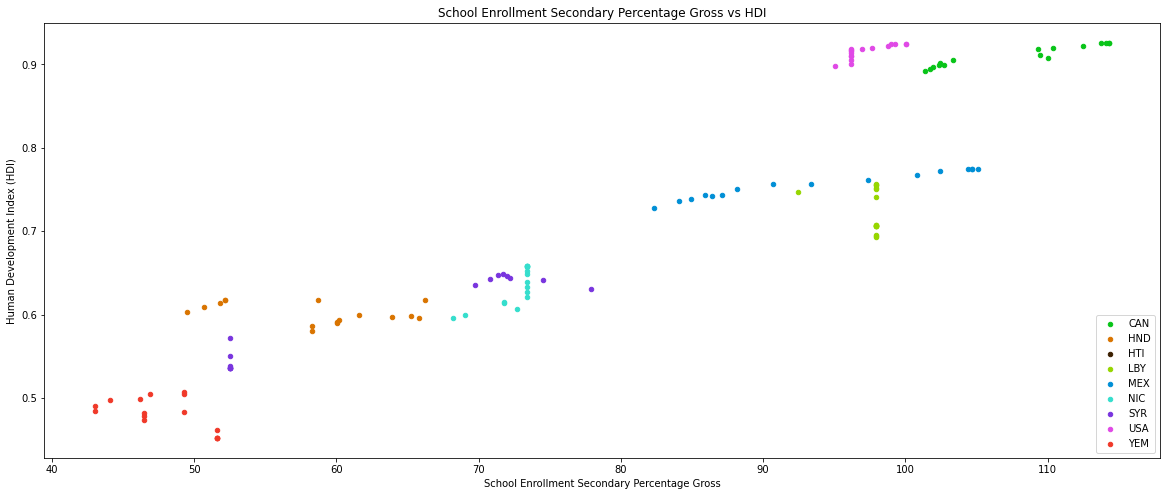

In [15]:
attributes = {
  'co2_emissions_metric_tons_per_capita': 'climate',
  'gdp': 'key_indicators',
  'death_rate_per_1000': 'key_indicators',
  'birth_rate_per_1000': 'key_indicators',
  'life_expectancy_at_birth': 'key_indicators',
  'school_enrollment_primary_percentage_gross': 'education',
  'school_enrollment_secondary_percentage_gross': 'education'
}

colorKey = {
  "CAN": "#08c418",
  "HND": "#d97400",
  "HTI": "#3b1f00",
  "LBY": "#96d600",
  "MEX": "#008fd6",
  "NIC": "#35decd",
  "SYR": "#7935de",
  "USA": "#e049e6",
  "YEM": "#f03929"
}

for attribute in attributes:
  name = attribute
  table = pd.read_csv("data/"+attributes[name])

  merged = keyIndicators.merge(table, on=['country_code', 'yr'], suffixes=(None, "_2"))

  # Draw the scatter plots country by country  
  fig, ax = plt.subplots(figsize=(20, 8))
  for key, group in merged.groupby(['country_code']):
    ax = group.plot(logx=(name=="gdp"), color=colorKey[key], ax=ax, kind='scatter', x=name, y='human_development_index', label=str(key)) # increase clarity of label    

  # The labels are used to define the legend. Move the legend to the upper right.    
  plt.legend(loc='lower right')

  # Define the name of the axes.
  plt.xlabel(name.replace("_", " ").title())
  plt.ylabel("Human Development Index (HDI)")

  # Title the figure.
  plt.title(name.replace("_", " ").title()+" vs HDI")

  # Plot the figure
  plt.show()

Histograms of Percent Population Growth Frquencies

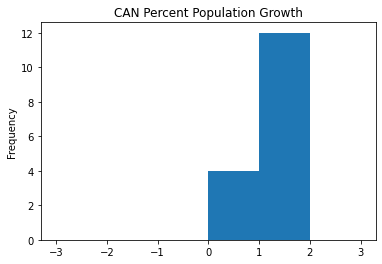

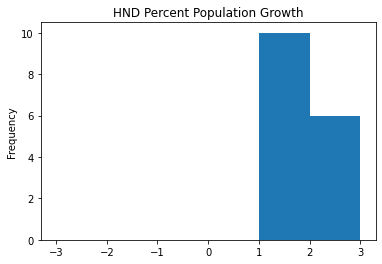

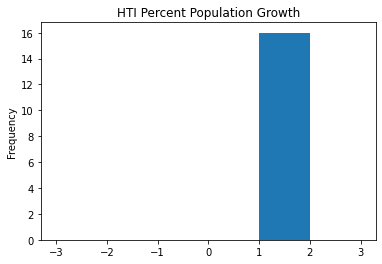

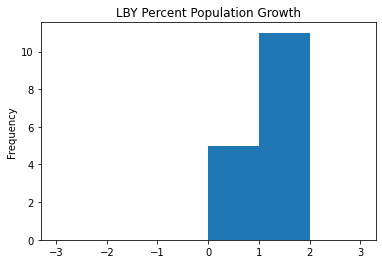

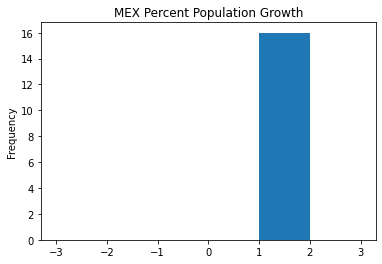

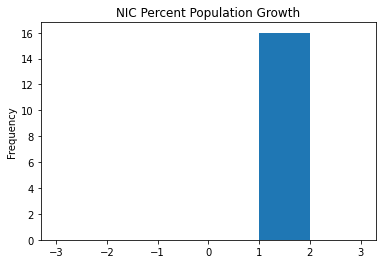

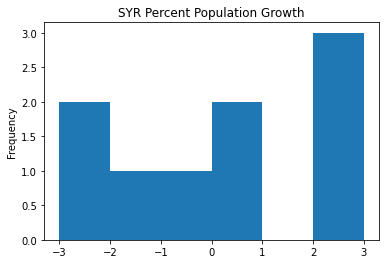

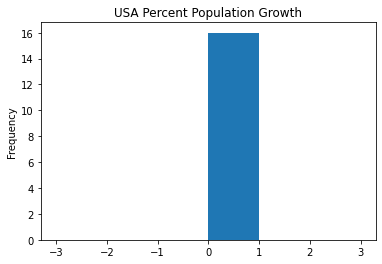

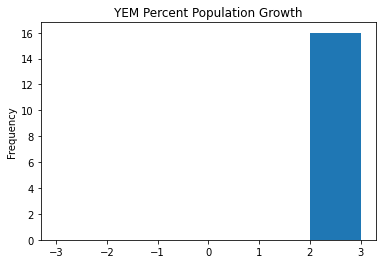

In [89]:
table = pd.read_csv("data/population")
attr = "percent_population_growth"

for countryCode in countryCodes:
  data = table[table['country_code'] == countryCode] 
  hist = data[attr].plot(kind='hist', title=(countryCode+" "+attr.replace('_', ' ').title()), bins=6, range=(-3, 3))
  plt.show()

Box Plots

In [115]:
# combine key indicators and health dataframes

health = pd.read_csv("data/health")

health_key_indicators = keyIndicators.merge(health, on=['country_code', 'yr'])

health_key_indicators['hdi_group'] = ""
health_key_indicators['human_development_index'] = health_key_indicators['human_development_index'].astype(float)




for i in range(len(health_key_indicators['hdi_group'])):
    if health_key_indicators['human_development_index'][i] >= 0.8:
        health_key_indicators['hdi_group'][i] = 'very high'
    elif health_key_indicators['human_development_index'][i] >= 0.7 and health_key_indicators['human_development_index'][i] <= 0.79:
        health_key_indicators['hdi_group'][i] = 'high'
    elif health_key_indicators['human_development_index'][i] >= 0.55 and health_key_indicators['human_development_index'][i] <= 0.69:
        health_key_indicators['hdi_group'][i] = 'medium'
    else:
        health_key_indicators['hdi_group'][i] = 'low'

C:\Users\user\AppData\Local\Temp\ipykernel_5288\2274252705.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_key_indicators['hdi_group'][i] = 'very high'
C:\Users\user\AppData\Local\Temp\ipykernel_5288\2274252705.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_key_indicators['hdi_group'][i] = 'medium'
C:\Users\user\AppData\Local\Temp\ipykernel_5288\2274252705.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  he

Text(0.5, 1.0, 'Compare mortality CVD, cancer, diabetes and CRD for 30 to 70 years olds percentage of different HDI groups')

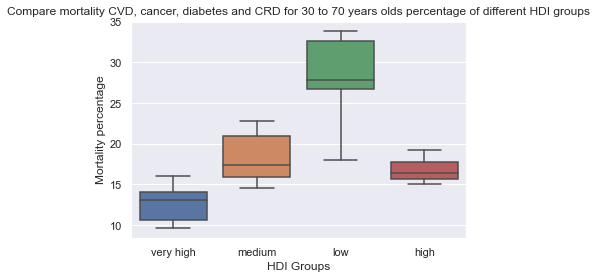

In [116]:
box5 = sns.boxplot(data=health_key_indicators, x='hdi_group', y='mortality_cvd_cancer_diabetes_crd_30_to_70_year_olds_percentage')
box5.set_ylabel('Mortality percentage')
box5.set_xlabel('HDI Groups')
box5.set_title('Compare mortality CVD, cancer, diabetes and CRD for 30 to 70 years olds percentage of different HDI groups')

Text(0.5, 1.0, 'Compare infant mortality rate per 1000 for different HDI groups')

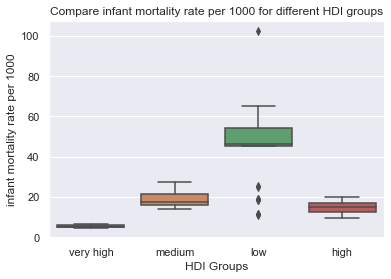

In [117]:
box6 = sns.boxplot(data=health_key_indicators, x='hdi_group', y='mortality_rate_infant_per_1000')
box6.set_ylabel('infant mortality rate per 1000')
box6.set_xlabel('HDI Groups')
box6.set_title('Compare infant mortality rate per 1000 for different HDI groups')

In [118]:
# combine key indicators and education dataframe

education = pd.read_csv("data/education")

education_key_indicators = keyIndicators.merge(education, on=['country_code', 'yr'])

In [119]:
education_key_indicators['hdi_group'] = "" #education_key_indicators['human_development_index']
education_key_indicators['human_development_index'] = education_key_indicators['human_development_index'].astype(float)

for i in range(len(education_key_indicators['hdi_group'])):
    if education_key_indicators['human_development_index'][i] >= 0.8:
        education_key_indicators['hdi_group'][i] = 'very high'
    elif education_key_indicators['human_development_index'][i] >= 0.7 and education_key_indicators['human_development_index'][i] <= 0.79:
        education_key_indicators['hdi_group'][i] = 'high'
    elif education_key_indicators['human_development_index'][i] >= 0.55 and education_key_indicators['human_development_index'][i] <= 0.69:
        education_key_indicators['hdi_group'][i] = 'medium'
    else:
        education_key_indicators['hdi_group'][i] = 'low'

C:\Users\user\AppData\Local\Temp\ipykernel_5288\1540486190.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_key_indicators['hdi_group'][i] = 'very high'
C:\Users\user\AppData\Local\Temp\ipykernel_5288\1540486190.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_key_indicators['hdi_group'][i] = 'medium'
C:\Users\user\AppData\Local\Temp\ipykernel_5288\1540486190.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

Text(0.5, 1.0, 'Compare Primary School Enrollment Percentage Gross of Different HDI Groups')

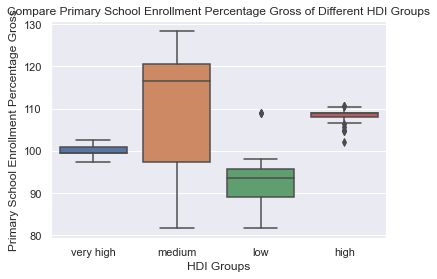

In [120]:
box1 = sns.boxplot(data=education_key_indicators, x='hdi_group', y='school_enrollment_primary_percentage_gross')
box1.set_ylabel('Primary School Enrollment Percentage Gross')
box1.set_xlabel('HDI Groups')
box1.set_title('Compare Primary School Enrollment Percentage Gross of Different HDI Groups')

Text(0.5, 1.0, 'Compare Secondary School Enrollment Percentage Gross of Different HDI Groups')

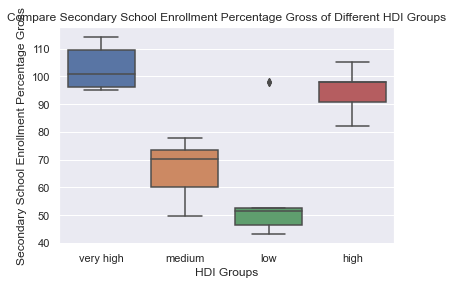

In [122]:
box2 = sns.boxplot(data=education_key_indicators, x='hdi_group', y='school_enrollment_secondary_percentage_gross')
box2.set_ylabel('Secondary School Enrollment Percentage Gross')
box2.set_xlabel('HDI Groups')
box2.set_title('Compare Secondary School Enrollment Percentage Gross of Different HDI Groups')

In [123]:
# combine key indicators and population dataframe
population = pd.read_csv("data/population")

population_key_indicators = keyIndicators.merge(population, on=['country_code', 'yr'])

# print out the number of missing values per column

population_key_indicators['hdi_group'] = ""
population_key_indicators['human_development_index'] = population_key_indicators['human_development_index'].astype(float)

for i in range(len(population_key_indicators['hdi_group'])):
    if population_key_indicators['human_development_index'][i] >= 0.8:
        population_key_indicators['hdi_group'][i] = 'very high'
    elif population_key_indicators['human_development_index'][i] >= 0.7 and population_key_indicators['human_development_index'][i] <= 0.79:
        population_key_indicators['hdi_group'][i] = 'high'
    elif population_key_indicators['human_development_index'][i] >= 0.55 and population_key_indicators['human_development_index'][i] <= 0.69:
        population_key_indicators['hdi_group'][i] = 'medium'
    else:
        population_key_indicators['hdi_group'][i] = 'low'

C:\Users\user\AppData\Local\Temp\ipykernel_5288\1616197417.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_key_indicators['hdi_group'][i] = 'very high'
C:\Users\user\AppData\Local\Temp\ipykernel_5288\1616197417.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_key_indicators['hdi_group'][i] = 'medium'
C:\Users\user\AppData\Local\Temp\ipykernel_5288\1616197417.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

Text(0.5, 1.0, 'Compare Population Growth Percentage of Different HDI Groups')

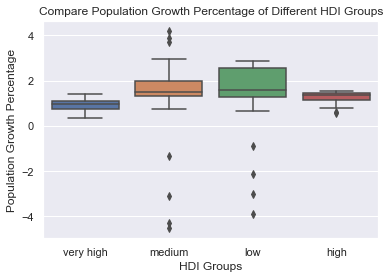

In [124]:
box3 = sns.boxplot(data=population_key_indicators, x='hdi_group', y='percent_population_growth')
box3.set_ylabel('Population Growth Percentage')
box3.set_xlabel('HDI Groups')
box3.set_title('Compare Population Growth Percentage of Different HDI Groups')

Text(0.5, 1.0, 'Compare percentage of demographics in rural of Different HDI Groups')

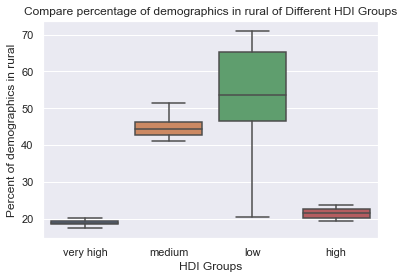

In [125]:
box4 = sns.boxplot(data=population_key_indicators, x='hdi_group', y='percent_demographics_in_rural')
box4.set_ylabel('Percent of demographics in rural')
box4.set_xlabel('HDI Groups')
box4.set_title('Compare percentage of demographics in rural of Different HDI Groups')

Line Of Best Fit

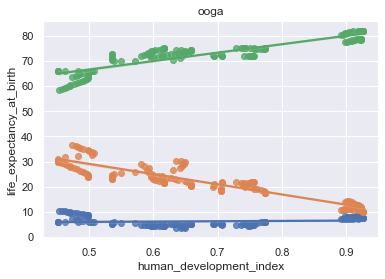

In [121]:
import seaborn as sns
table = pd.read_csv("data/key_indicators")
sns.set_theme(color_codes=True)
facts = ['death_rate_per_1000','birth_rate_per_1000','life_expectancy_at_birth']
for fact in facts:
  sns.regplot(x="human_development_index", y=fact, data=table).set(title='ooga')
